## EFRCourierOpenLoop Report


In [16]:
import cmlreaders as cml
import matplotlib.pyplot as plt
# from ptsa.data.filters import ButterworthFilter
# from ptsa.data.filters import MorletWaveletFilter
# import xarray as xr
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from eeg_check import eeg_check,plot_eeg_check_jlab,erp_sme

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_to_pybeh as pb
from pandas_to_pybeh import *
import seaborn as sns
import os,sys,argparse,glob

import json
from  matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', 1000)
import warnings
warnings.filterwarnings("ignore")

In [18]:
# add 'phase' column to events df (with 'encoding', 'retrieval' for FR, FFR (final FR) or FSR (final store recall))
def add_phase(evs):
    new_evs = pd.DataFrame([])
    for ind,list_evs in evs.groupby('trial'): # 'trial' is the aquivalent of a delivery day
        if list_evs['trial'].unique()!=-999:
            list_evs['phase']='nan'

            # find indexes of encoding start and end
            first_pointing_index = min(list_evs[list_evs['type']=='pointing begins'].index)
            navigation_end_index = min(list_evs[list_evs['type']=='TRIAL_END'].index)-1
            list_evs.loc[first_pointing_index:navigation_end_index]['phase']='encoding'

            # find indexes of retrieval start and end
            rec_start_index = list_evs[list_evs['type']=='REC_START'].index[0]
            rec_end_index = list_evs[list_evs['type']=='REC_STOP'].index[0]
            list_evs.loc[rec_start_index:rec_end_index]['phase']='retrieval'

            if len(list_evs[list_evs.type=='FSR_START'])>0: # relevant only for the final trial
                # find indexes of Final FR for stores start and end
                FSR_start_index = list_evs[list_evs['type']=='FSR_START'].index[0]
                FSR_end_index = list_evs[list_evs['type']=='FSR_STOP'].index[0]
                list_evs.loc[FSR_start_index:FSR_end_index]['phase']='FSR'

                 # find indexes of Final FR for items start and end
                FFR_start_index = list_evs[list_evs['type']=='FFR_START'].index[0]
                FFR_end_index = list_evs[list_evs['type']=='FFR_STOP'].index[0]
                list_evs.loc[FFR_start_index:FFR_end_index]['phase']='FFR'

        elif list_evs['trial'].unique()==-999:
            list_evs['phase']='nan'
            

        new_evs=pd.concat([new_evs,list_evs])

    return new_evs



In [19]:
whole_df = cml.CMLReader.get_data_index() 
sub_df_exp = 'EFRCourierOpenLoop' # 'EFRCourierReadOnly'#
sub_df = whole_df.query('experiment == @sub_df_exp')
sub_df


,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,0,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
1,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,1,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
2,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,2,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
4,NaN,protocols/r1/subjects/FBG491/experiments/EFRCo...,protocols/r1/subjects/FBG491/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG491/localizations/0/m...,NaN,1,FBG491,FBG491,4.0,protocols/r1/subjects/FBG491/experiments/EFRCo...
5,NaN,protocols/r1/subjects/FBG491/experiments/EFRCo...,protocols/r1/subjects/FBG491/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG491/localizations/0/m...,NaN,2,FBG491,FBG491,4.0,protocols/r1/subjects/FBG491/experiments/EFRCo...
6,NaN,protocols/r1/subjects/FR491/experiments/EFRCou...,protocols/r1/subjects/FR491/localizations/0/mo...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FR491/localizations/0/mo...,NaN,1,FR491,FR491,4.0,protocols/r1/subjects/FR491/experiments/EFRCou...
7,NaN,protocols/r1/subjects/FR491/experiments/EFRCou...,protocols/r1/subjects/FR491/localizations/0/mo...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FR491/localizations/0/mo...,NaN,2,FR491,FR491,4.0,protocols/r1/subjects/FR491/experiments/EFRCou...
2700,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,3,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2701,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,4,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2837,NaN,protocols/r1/subjects/R1653J/experiments/EFRCo...,protocols/r1/subjects/R1653J/localizations/1/m...,EFRCourierOpenLoop,build,1,NaN,1,NaN,NaN,protocols/r1/subjects/R1653J/localizations/1/m...,NaN,0,R1653J,R1653J_1,4.0,protocols/r1/subjects/R1653J/experiments/EFRCo...


choose subject 

In [20]:
whole_df = cml.CMLReader.get_data_index() 
sub_df_exp = 'EFRCourierOpenLoop' #'EFRCourierReadOnly'#
sub_df_subject = 'R1620J'# 'R1620J' # R1637T
sub_df_session=3
sub_df = whole_df.query('experiment == @sub_df_exp and subject == @sub_df_subject and session == @sub_df_session')

# sub_df_subject = sub_df.iloc[0]['subject']
# sub_df_exp = sub_df.iloc[0]['experiment']
# sub_df_session = sub_df.iloc[0]['session']
sub_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
2700,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,3,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...


In [21]:
print(sub_df_subject+' subject, ' +sub_df_exp+ ' session '+str(sub_df_session))


R1620J subject, EFRCourierOpenLoop session 3


In [23]:
reader = cml.CMLReader(subject=sub_df_subject, experiment=sub_df_exp, session=sub_df_session)
evs = reader.load('task_events')
evs.head(6)
full_evs = add_phase(evs)
full_evs
# evs.phase.unique()

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
0,6902,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633231280,nan,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,START
1,6973,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654633231351,nan,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,store mappings
625,3301267,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-1,<>,-1,0,20,1654636525645,nan,-999,-999,r1,-999,2108,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,SR_REC_WORD_VV
626,3301770,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-1,<>,-1,0,20,1654636526148,nan,-999,-999,r1,-999,2611,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,SR_REC_WORD_VV
628,3302346,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-1,<>,-1,0,20,1654636526724,nan,-999,-999,r1,-999,3187,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,SR_REC_WORD_VV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,3569623,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654636794001,FFR,-999,-999,r1,-999,-999,-999,3,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.0,4,STIM
749,3575624,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654636800002,FFR,-999,-999,r1,-999,-999,-999,3,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.0,4,STIM
752,3581625,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654636806003,FFR,-999,-999,r1,-999,-999,-999,3,"{'_remove': 0, 'amplitude': 0.5, 'anode_label'...",-999,-999.0,-999.0,R1620J,-999.0,4,STIM
753,3584622,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,0,-1,1654636809000,FFR,-999,-999,r1,-999,-999,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,4,FFR_STOP


In [26]:
full_evs.type.unique()

array(['START', 'store mappings', 'SR_REC_WORD_VV', 'SR_REC_WORD',
       'FFR_REC_WORD_VV', 'FFR_REC_WORD', 'TRIAL_START',
       'pointing begins', 'pointing finished', 'STIM', 'WORD',
       'TRIAL_END', 'REC_START', 'REC_WORD', 'REC_WORD_VV', 'REC_STOP',
       'CUED_REC_CUE', 'CUED_REC_WORD', 'CUED_REC_STOP',
       'CUED_REC_WORD_VV', 'FSR_START', 'FSR_STOP', 'FFR_START',
       'FFR_STOP', 'SESS_END'], dtype=object)

# Behavioural Data

## Navigation 

Histogram of navigation time between each two stores

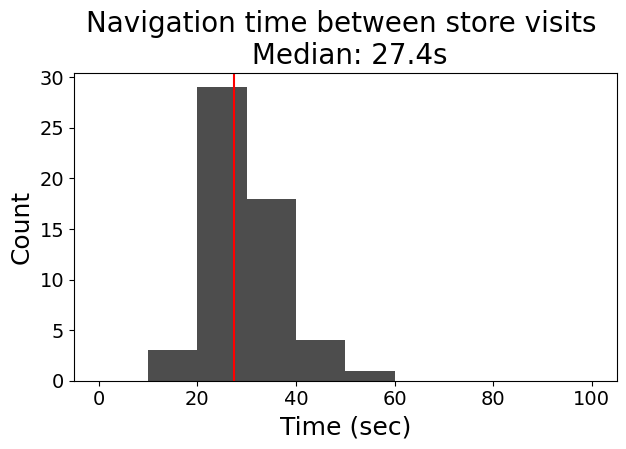

In [10]:
word_evs = full_evs.query('type == "WORD"')
total_delivery_time = []

for trial, trial_evs in word_evs.groupby("trial"):
    delivery_times = np.diff(trial_evs.mstime) / 1000
    total_delivery_time.extend(delivery_times)

median = np.median(total_delivery_time)
median = float("{0:.2f}".format(median))
fig, ax = plt.subplots(figsize=(7,4))
plt.hist(total_delivery_time, color=(0.3,0.3,0.3), range=(0, 100))
plt.axvline(np.median(total_delivery_time), color="r")
plt.title("Navigation time between store visits \n Median: {}s".format(median), fontsize=20)
plt.xlabel("Time (sec)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# make ticks larger
plt.show()

Histogram of navigation time between each two stores in town.

Prior data shows that in 80% of trials patient reach the next store within 50 sec.
Too long navigation times may indicate that patients paused playing the game or did not understand the instructions.

# Pointing task 
Here I'm plotting the polar graph for the pointing task using Deepti's code

In [11]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.pi/18

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=True, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [12]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
pointing_evs

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
4,151332,178.375000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.000000,-999.00000,R1620J,61.90625,0,pointing finished
8,180205,307.500000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-3.070312,-58.50000,R1620J,304.00000,0,pointing finished
11,218826,102.375000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-29.562500,-37.25000,R1620J,95.75000,0,pointing finished
14,244267,29.390625,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,32.187500,-60.90625,R1620J,37.75000,0,pointing finished
17,270292,291.000000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,59.281250,-9.15625,R1620J,276.25000,0,pointing finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,2890160,32.843750,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-38.937500,-61.87500,R1620J,63.50000,4,pointing finished
535,2926762,192.500000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,36.750000,59.06250,R1620J,201.12500,4,pointing finished
538,2958763,86.500000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,14.492188,-33.75000,R1620J,63.15625,4,pointing finished
542,2987165,286.750000,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,62.343750,-33.50000,R1620J,275.25000,4,pointing finished


Add columns 'storeX' and 'storeZ' that represents the location of stores in town

In [13]:
# # these columns are absent in the new task, so I am creating them from the store position column
# pointing_tasks = full_evs[full_evs.type == 'pointing finished']
# pointing_tasks['store position']
# storeX = []; storeZ = []
# for trial in range(0,len(pointing_tasks['store position'])):
#     position=pointing_tasks['store position'].iloc[trial]
#     try:
#         new_tuple=eval(position)
#         storeX.append(new_tuple[0])
#         storeZ.append(new_tuple[2])
#     except:
#         storeX.append(-999)
#         storeZ.append(-999)

# # Add new columns to df:
# pointing_tasks['storeX'] = storeX
# pointing_tasks['storeZ'] = storeZ



For this part we need to populate the 'trial' column.
To do this, we can use the 'msmtime' under full_evs[full_evs.type=='start deliveries'] and the 'msmtime' under 'stop deliveries', and populate all in between events using the same trial number.
If trial number is not important though, we can skip this part

In [14]:
# store_evs = pointing_tasks[(pointing_tasks['storeX']!=-999) & (pointing_tasks['storeZ']!=-999)]
# stores = store_evs.groupby('store') # looking at store position in evs and comparing to player position in evs 
# stores = stores.agg('mean')[['storeX', 'storeZ']]
# storeX = stores['storeX'].values
# storeZ = stores['storeZ'].values
# stores = stores[1:]
# stores

In [15]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
filt_point_evs = pointing_evs[(pointing_evs['storeX']) != -999.00]
# print(len(pointing_evs))
# print(len(filt_point_evs))

#find the raw pointing error for each pointing task completed
submitted_point = filt_point_evs['submittedPointingDirection'] 
correct_point = filt_point_evs['correctPointingDirection']
difference = np.radians(submitted_point - correct_point)
difference = (difference + np.pi) % (2 * np.pi) - np.pi
difference = np.array(difference)

#find the store locations for all stores visited 
store_evs = full_evs[~pd.isnull(full_evs['storeX'])]
store_evs = store_evs[~pd.isnull(store_evs['store'])]
stores = store_evs.groupby('store')  
stores = stores.agg('mean')[['storeX', 'storeZ']]
storeX = stores['storeX'].values
storeZ = stores['storeZ'].values

pos_angles = []
correct_point = np.array(correct_point)
x = 0
for i, finished_row in filt_point_evs.iterrows():
    position_x, position_z = finished_row[['presX', 'presZ']]
    difference_x = (storeX - position_x)
    difference_z = (storeZ - position_z)
    angle = np.arctan2(difference_z, difference_x) 
    angle = (angle + np.pi) % (2 * np.pi) - np.pi
    angle = np.abs(angle)
    pos_angles.append(np.median(angle - correct_point[x]))
    x = x + 1

# apply correction of pointing error and wrap again to display nicely
pos_angles = np.array(pos_angles)
pos_angles = np.radians(pos_angles)
point_error = difference/ pos_angles
point_error = (point_error + np.pi) % (2 * np.pi) - np.pi


TypeError: Could not convert R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252R1620J_EFRCourierOpenLoop_3_22Dec23_2252 to numeric

Plot:

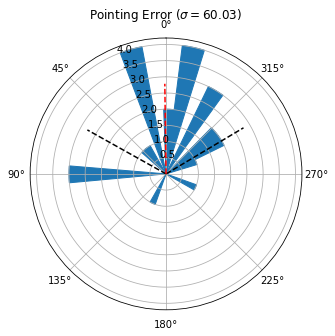

In [273]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, point_error, offset = np.pi/2, bins = 30, density = False)
plt.title('Pointing Error ($\sigma = {:.2f}$)'.format(point_error.std()*180/np.pi))
ax.vlines([np.mean(point_error)+point_error.std(), np.mean(point_error)-point_error.std()], ymin = 0, 
          ymax = np.max(point_error.size/np.pi)*0.35, ls = "--", colors = 'k')
ax.vlines(np.mean(point_error), ymin = 0, ymax=np.max(point_error.size/np.pi)*0.35,ls = '--', colors = 'r')
plt.show()


full_evs# Recall Rates

In [16]:
full_evs.columns

Index(['eegoffset', 'correctPointingDirection', 'eegfile', 'efr_mark',
       'experiment', 'finalrecalled', 'intruded', 'intrusion', 'item',
       'itemno', 'montage', 'msoffset', 'mstime', 'phase', 'presX', 'presZ',
       'protocol', 'recalled', 'rectime', 'serialpos', 'session',
       'stim_params', 'store', 'storeX', 'storeZ', 'subject',
       'submittedPointingDirection', 'trial', 'type'],
      dtype='object')

Add 1/0 to 'recalled column' for the cued recall condition

In [17]:
# cued_events=full_evs[full_evs.type.isin(["CUED_REC_WORD","CUED_REC_CUE"])]
# correct_recall_index=[]
# # for i,trial_data in cued_events.groupby(['trial']):
# #     trial_data
# for ind in range(0,len(full_evs)):
#     if full_evs.iloc[ind]['type']== 'CUED_REC_WORD':
#         if full_evs.iloc[ind]['item'] == full_evs.iloc[ind-1]['item']:
#                 correct_recall_index.append(ind)
# correct_recall_index

In [18]:
# this code should be adjusted - generalize beyond i-2...
correct_recall=[]
wrong_recall=[]
for ind,row in full_evs.iterrows():
    if row['type']== 'CUED_REC_WORD' and full_evs.loc[ind-1]['type']=='CUED_REC_CUE':
        if row['item'] == full_evs.loc[ind-1]['item']:
                correct_recall.append(ind)
        elif row['item'] != full_evs.loc[ind-1]['item']:
                wrong_recall.append(ind)
    if row['type']== 'CUED_REC_WORD' and full_evs.loc[ind-1]['type']=='CUED_REC_WORD_VV':
        if row['item'] == full_evs.loc[ind-2]['item']:
                correct_recall.append(ind)
        elif row['item'] != full_evs.loc[ind-1]['item']:
                wrong_recall.append(ind)


In [19]:
# cued_recalled=np.zeros(len(full_evs))*np.nan
# full_evs['cued_recalled']=cued_recalled
# full_evs.columns

In [20]:
# check
full_evs.loc[correct_recall , 'recalled'] = 1
full_evs.loc[wrong_recall , 'recalled'] = 0
# full_evs[full_evs.isin(['CUED_REC_WORD','CUED_REC_CUE'])]
full_evs[full_evs.type.isin(['CUED_REC_WORD','CUED_REC_CUE'])].head(10)

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
89,624649,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,GARLIC,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pizzeria,35.406250,-33.125000,R1620J,-999.0,0,CUED_REC_CUE
90,626402,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,GARLIC,91,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.000000,-999.000000,R1620J,-999.0,0,CUED_REC_WORD
92,634280,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,FERNS,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",florist,-38.937500,-61.875000,R1620J,-999.0,0,CUED_REC_CUE
95,644109,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,FLUORIDE,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",dentist,-29.562500,-37.250000,R1620J,-999.0,0,CUED_REC_CUE
99,653523,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,HAM,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",grocery_store,-9.093750,17.859375,R1620J,-999.0,0,CUED_REC_CUE
102,660597,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,COFFEE,49,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.000000,-999.000000,R1620J,-999.0,0,CUED_REC_WORD
104,663322,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,AMPLIFIER,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",music_store,32.187500,-60.906250,R1620J,-999.0,0,CUED_REC_CUE
107,672723,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,PUMP,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",bike_shop,35.062500,26.656250,R1620J,-999.0,0,CUED_REC_CUE
109,677204,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,PUMP,165,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.000000,-999.000000,R1620J,-999.0,0,CUED_REC_WORD
111,682123,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,TRAIN_SET,-999,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",toy_store,26.484375,16.953125,R1620J,-999.0,0,CUED_REC_CUE


Add 1/0 to 'recalled' column for the final item recall condition

In [21]:
correct_recall=[]
wrong_recall=[]
for ind,row in full_evs.iterrows():
    if row['type']== 'FFR_REC_WORD':
#         print(row['item'])
        if row['item'] in list(full_evs[full_evs.type=='WORD']['item']):
            correct_recall.append(ind)
        else:
            wrong_recall.append(ind)

correct_recall

[670,
 671,
 672,
 673,
 675,
 676,
 680,
 687,
 689,
 690,
 692,
 696,
 697,
 700,
 702,
 703,
 704,
 707,
 714,
 718,
 728,
 729,
 731,
 738,
 739]

In [22]:
# check
full_evs.loc[correct_recall , 'recalled'] = 1
full_evs.loc[wrong_recall , 'recalled'] = 0
# full_evs[full_evs.isin(['CUED_REC_WORD','CUED_REC_CUE'])]
full_evs[full_evs.type.isin(['FFR_REC_WORD'])].head(10)

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
670,3408470,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,ASPIRIN,10,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
671,3409430,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,ADVIL,2,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
672,3410539,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,X-RAY_MACHINE,235,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
673,3413484,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,RETAINER,174,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
675,3415212,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,ORCHIDS,148,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
676,3418647,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,EMERALD,79,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
680,3423876,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,CDS,40,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
682,3427050,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,RECORD_PLAYER,-1,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
687,3433702,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,BRUSHES,31,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD
688,3434217,-999.0,R1620J_EFRCourierOpenLoop_3_22Dec23_2252,-999,EFRCourierOpenLoop,-999,-999,-999,SHAMPOO,191,...,-999,3,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0,-999.0,R1620J,-999.0,-999,FFR_REC_WORD


In [23]:
# cued_rec_word = full_evs.query('type == "CUED_REC_WORD"')
# for i, row in cued_rec_word.iterrows():
#     if row['item'] == row['cued_item']:
#         full_evs.at[i, "recalled"] = 1
#     else:
#         full_evs.at[i, "recalled"] = 0

# FFR_item = full_evs.query('type == "FFR_REC_WORD"')
# FFR_item = FFR_item.drop_duplicates(subset=["item"])
# FFR_item["recalled"] = FFR_item["serialpos"] > 0

In [24]:
# def add_cued_recalled(events):
#     def find_recall(row):
#         itemno = row['itemno']
#         recalls = events[(events["type"] == 'CUED_REC_CUE') &
#                          (events["session"] == row["session"]) &
#                          (events["trial"] == row["trial"])]["itemno"].values
#         return 1 if itemno in recalls else 0

#     events = events.sort_values("mstime")
#     events.loc[events["type"] =="WORD", "cued_recalled"] = events.loc[events["type"] == "WORD"].apply(find_recall, axis=1)
#     events.loc[events["type"] =="CUED_REC_WORD", "cued_recalled"] = events.loc[events["type"] == "CUED_REC_WORD"].apply(find_recall, axis=1)

#     return events

# def add_store_recalled(events, df):
#     def calculate_recall(row):
#         sess_df = events[(events.subject == row.subject) & (events.session == row.session)]
#         stores = sess_df.query('type == "WORD"').store.unique()
#         recalls = sess_df.query('type == "FSR_REC_WORD"').item.unique()
#         recall_prob = np.sum([1 for store in stores if store in recalls]) / len(stores)
#         return recall_prob
    
#     df["final_store_prob"] = df.apply(calculate_recall, axis=1)
#     return df

In [25]:
# mean number of correct recalls
for i,row in full_evs.query('type == "WORD"').groupby(["subject", "session"]):
    mean_recalled=np.mean(row['recalled'])
# mean number of correct cued recalls
for i,row in full_evs.query('type == "CUED_REC_WORD"').groupby(["subject", "session"]):
    mean_cued_recalled=np.mean(row['recalled'])
# mean number of correct final store recalls
for i,row in full_evs.query('type == "SR_REC_WORD"').groupby(["subject", "session"]):
    correct_store_mean = len(row[row['intrusion']==0])/len(row)
# mean number of correct final items recalls
for i,row in full_evs.query('type == "FFR_REC_WORD"').groupby(["subject", "session"]):
    correct_item_mean = np.sum(row['recalled'])/len(row)


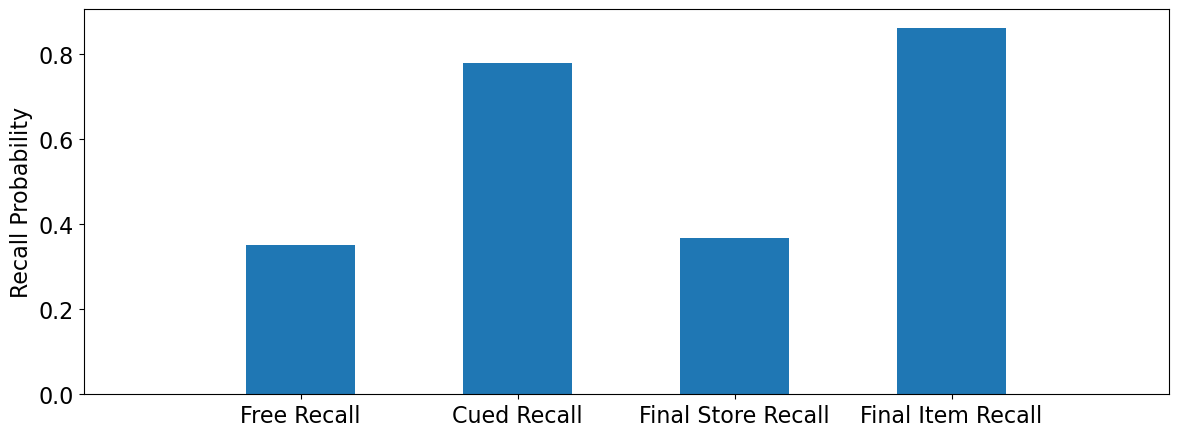

In [26]:
# import matplotlib.pyplot as plt
# import numpy as np

BAR_WIDTH = 0.5     # 0. < BAR_WIDTH <= 1.

def main():
    # the data you want to plot
    categories = ["Free Recall", "Cued Recall","Final Store Recall",'Final Item Recall']
    values     = [ mean_recalled,  mean_cued_recalled, correct_store_mean,correct_item_mean]
    # x-values for the center of each bar
    xs = np.arange(1, len(categories) + 1)
    # plot each bar centered
    fig, ax = plt.subplots(figsize=(14, 5))
    plt.bar(xs, values, width=BAR_WIDTH,align='center')
    # add bar labels
    plt.xticks(xs, categories,fontsize=16)
#     plt.xlabels(fontsize=18)
    plt.yticks(fontsize=16)
    plt.ylabel('Recall Probability',fontsize=16)
    # make sure the chart is centered
    plt.xlim(0, len(categories) + 1)
    # show the results
    plt.show()

main()

- Above recall probabilities were calculated while ignoring any subsequent key presses

# Intrusion Analysis

In [27]:
#FREE RECALL
# Correct Rejection : intrusion != 0 and keypress == True
# False Alarm: intrusion == 0 / recalled == 1 and keypress == True
# Miss : intrusion != 0 and keypress == False
# Hit: intrusion == 0 and keypress == False

#CUED RECALL                              #intra-list intrusion
# Correct Rejection : ( intrusion != 0 | (intrusion == 0 and recalled == 0) ) and keypress == True
# False Alarm: recalled == 1 and keypress == True
# Miss : ( intrusion != 0 | (intrusion == 0 and recalled == 0) ) and keypress == False
# Hit: intrusion == 0 and recalled == 1 and keypress == False

intrusion_df = pd.DataFrame(columns=["subject", "session", "trial", "type", "intrusion_type"])

rec_evs = full_evs.query('type == "REC_WORD"')
for i, row in rec_evs.iterrows():
    if row.intrusion != 0 and row.efr_mark == True:
        intrusion_type = "intrusions rejected"
    elif (row.intrusion == 0 or row.recalled == 1) and row.efr_mark == True:
        intrusion_type = "correct recalls rejected"
    elif row.intrusion != 0 and row.efr_mark != True:
        intrusion_type = "intrusions accepted"
    elif row.intrusion == 0 and row.efr_mark != True:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Free Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)
    
cued_rec_evs = full_evs.query('type == "CUED_REC_WORD"')
for i, row in cued_rec_evs.iterrows():
    if row.recalled == 0 and row.efr_mark == True:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.efr_mark == True:
        intrusion_type = "correct recalls rejected"
    elif row.recalled == 0 and row.efr_mark == -999:
        intrusion_type = "intrusions accepted"
    elif row.recalled == 1 and row.efr_mark == -999:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Cued Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)
    
ffr_rec_evs = full_evs.query('type == "FFR_REC_WORD"')
for i, row in ffr_rec_evs.iterrows():
    if row.intrusion < 0 and row.efr_mark == True:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.efr_mark == True:
        intrusion_type = "correct recalls rejected"
    elif row.intrusion < 0 and row.efr_mark != True:
        intrusion_type = "intrusions accepted"
    elif row.intrusion >= 0 and row.efr_mark != True:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Final Free Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [28]:
table = intrusion_df.groupby(["subject", "session", "trial", "type", "intrusion_type"]).size().reset_index(name='counts')

NameError: name 'sns' is not defined

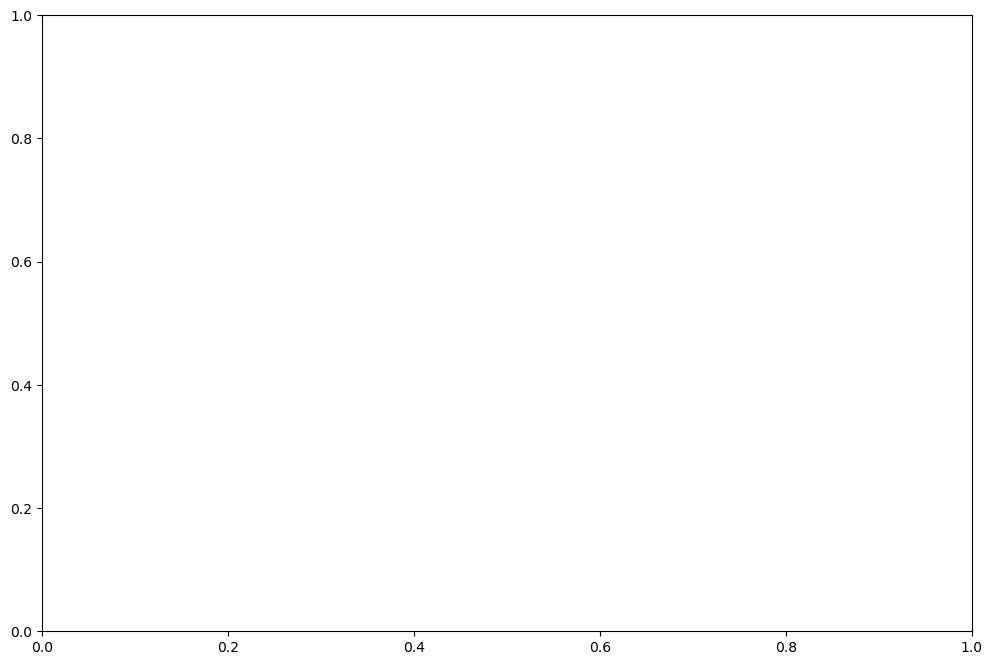

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
p = sns.barplot(data=table, 
                x="type", 
                order=["Free Recall", "Cued Recall", "Final Free Recall"],
                y="counts", 
                hue="intrusion_type", 
                hue_order=["intrusions rejected", 
                           "correct recalls rejected", 
                           "intrusions accepted", 
                           "correct recalls accepted"],
#                 palette="crest",
                ci=68,
                capsize=0.05)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("")
plt.ylabel("Counts", fontsize=18)
plt.gca().legend().set_title('')
# ax.yaxis.grid()
plt.show()

** Note that this is the sum over all delivery days

- Intrusions rejected: Intrusions that were correctly rejected
- Correct recalls rejected: Correct recalls that were incorrectly rejected
- Intrusions accepted: Correct recalls that were not rejected
- Correct recalls accepted: Intrusions that were not rejected

In [288]:
ci=None if len(full_evs.subject.unique()) < 5 else 68

# SPC

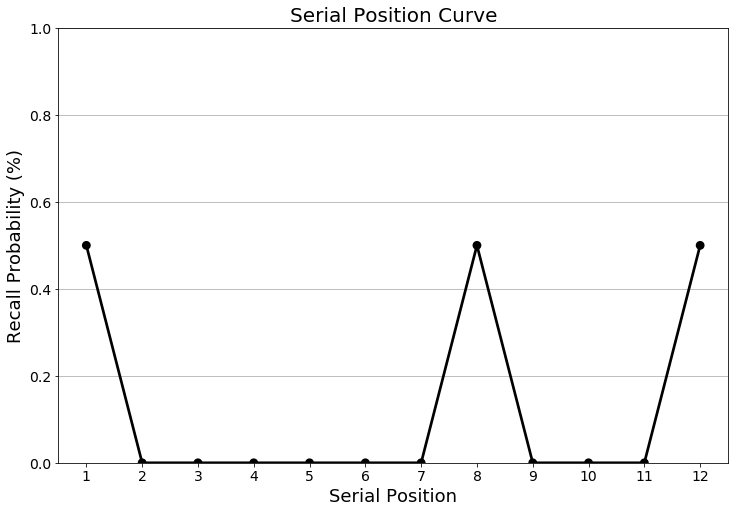

In [289]:
spc_df = full_evs.query("type=='WORD'").groupby(['subject', 'session', 'serialpos']) \
                                       .agg({'recalled':np.nanmean}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
spc = sns.pointplot(data=spc_df, x='serialpos', y='recalled', ci=ci,
                    color='k', err_style='bars', capsize=.3, label="SPC")

plt.xlabel('Serial Position', fontsize=18)
plt.ylabel('Recall Probability (%)', fontsize=18); plt.ylim([0,1])
ax.yaxis.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Serial Position Curve", fontsize=20)
plt.show()

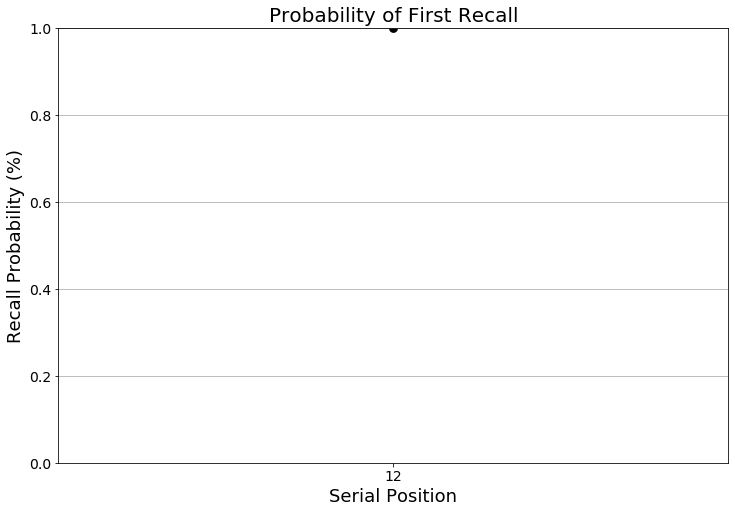

In [294]:
recword = full_evs.query('type=="REC_WORD"')
recword['pos'] = recword.groupby(['subject', 'session', 'trial']).cumcount()
first_recall_df = recword.query('pos == 0 and serialpos >= 0')
first_recall_df = first_recall_df.groupby(
    ['subject', 'session', 'serialpos']).agg(
    {'recalled': 'count'}).unstack(fill_value=0).stack().reset_index()
first_recall_df['n_lists'] = first_recall_df.groupby(['subject'])['recalled'].transform('sum')
first_recall_df['prob'] = first_recall_df['recalled'] / first_recall_df['n_lists']

fig, ax = plt.subplots(figsize=(12, 8))
pfr = sns.pointplot(data=first_recall_df, x='serialpos', y='prob', ci=ci,
                    color='k', err_style='bars', capsize=.1)
plt.xlabel('Serial Position', fontsize=18)
plt.ylabel('Recall Probability (%)', fontsize=18); plt.ylim([0,1])
ax.yaxis.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Probability of First Recall", fontsize=20)
plt.show()

# Lag-CRP

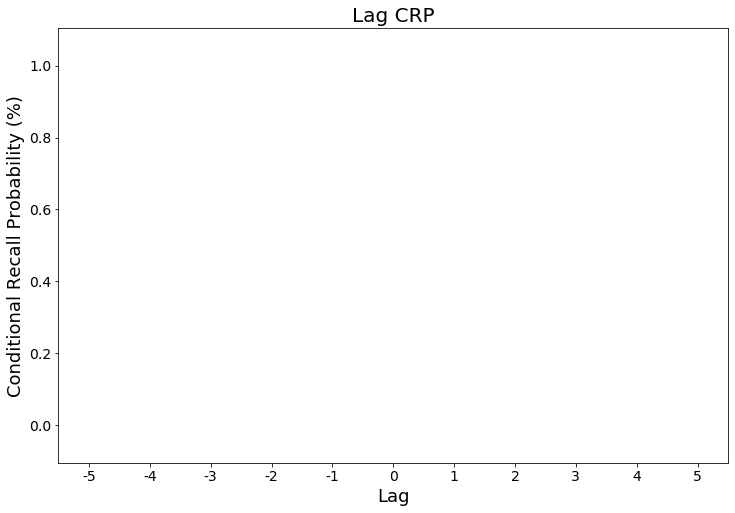

In [254]:
full_evs['itemno'] = full_evs['item'].astype('category').cat.codes
crp_df = full_evs.groupby(['subject']).apply(
    pb.pd_crp,
    itemno_column='itemno',
    list_index=['subject', 'session', 'trial'],
    lag_num=5).reset_index()

fig, ax = plt.subplots(figsize=(12,8))
crp = sns.pointplot(data=crp_df, x='lag', y='prob', ci=ci,
                    color='k', err_style='bars', capsize=.2)
plt.title("Lag CRP", fontsize=20)
plt.xlabel("Lag", fontsize=18)
plt.ylabel("Conditional Recall Probability (%)", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.grid()
# p.yaxis.grid()
plt.show()

# Spatial CRP

In [255]:
# def isolate_storeX(row):
#     store_location = eval(row['store position'])
#     return store_location[0]

# def isolate_storeZ(row):
#     store_location = eval(row['store position'])
#     return store_location[2]

# def isolate_playerX(row):
#     player_position = eval(row['player position'])
#     return player_position[0]

# def isolate_playerZ(row):
#     player_position = eval(row['player position'])
#     return player_position[2]

# full_evs.loc[full_evs["type"] == "WORD", "storeX"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_storeX, axis=1)
# full_evs.loc[full_evs["type"] == "WORD", "storeZ"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_storeZ, axis=1)
# full_evs.loc[full_evs["type"] == "WORD", "presX"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_playerX, axis=1)
# full_evs.loc[full_evs["type"] == "WORD", "presZ"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_playerZ, axis=1)

In [307]:
def get_new_item_id(item, wordpool=[]):
    if item not in wordpool:
        return -999
    return wordpool.index(item)

# need to redo itemno because not using all items in wordpool
word_evs = full_evs.query('type == "WORD" and itemno > -1')
wordpool_subset = word_evs.item.unique().tolist()
full_evs['itemno'] = full_evs['item'].transform(get_new_item_id, wordpool=wordpool_subset)

In [316]:
word_evs = full_evs.query('type == "WORD"')
#word_evs = full_evs.query('itemno != -999 and type == "WORD"')
store_items = word_evs[['store', 'item', 'itemno']].drop_duplicates()
sub_store_locs = word_evs[['store', "storeX", "storeZ", 'subject']].drop_duplicates()
sub_store_locs['type'] = 'WORD_VALS'
loc_evs = sub_store_locs.merge(store_items)
# loc_evs = loc_evs.sort_values('itemno')
test_evs = full_evs.append(loc_evs)

In [325]:
bins = [12.96160383, 41.99123618, 61.53639199, 77.73374529, 97.11224258]

spatial_crp = test_evs.groupby('subject').apply(
    pb.pd_sem_crp, list_index=['subject', 'session', 'trial'], 
    sim_columns=['storeX', 'storeZ'], bins=bins, ret_counts=False).reset_index()

In [318]:
fig = plt.figure(figsize = (12,8))
fig.patch.set_facecolor('white')
ax1 = sns.pointplot(data=spatial_crp, x='sem_bin', y='prob', marker = 'o', color = 'black', capsize=0.1, ci=ci)
ax1.set_xlabel('Distance bin', fontsize=18)
ax1.set_xticklabels(["very near", "near", "intermediate", "far", "very far"], fontsize=14)
ax1.set_ylabel('Conditional response probability (%)', fontsize=18)
plt.yticks(fontsize=14)
ax1.yaxis.grid()
plt.tick_params(labelsize=16)
plt.ylim(0)
plt.title("Spatial CRP", fontsize=20)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 864x576 with 0 Axes>

# Navigation Trajectory

In [328]:
import random
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


for i, row in deliv_table.iterrows():

    print("{} session {}".format(row.subject, row.session))
    # pull up jsonl file from data2 directory
    file_name = "{}/session_{}/session.jsonl".format(row.subject, row.session)
    file_dir = os.path.join(data_dir, file_name)

    new_file = []
    for line in open(file_dir, "r"):
        # replace this specific entry to empty string
        if '"point condition":SerialPosition,' in line:
            line = line.replace('"point condition":SerialPosition,', '')
        elif '"point condition":SpatialPosition,' in line:
            line = line.replace('"point condition":SpatialPosition,', '')
        elif '"point condition":Random,' in line:
            line = line.replace('"point condition":Random,', '')

        data_dict = json.loads(line)
        new_file.append(data_dict)

    with open("session_tmp.jsonl", "w") as outfile:
        for line in new_file:
            json.dump(line, outfile)
            outfile.write('\n')

    log = pd.read_json("session_tmp.jsonl", lines=True)
    log = log[(log.type=='PlayerTransform')|(log.type=='object presentation begins')]

    def extract_position(row):
        if row.type=='PlayerTransform':
            return (row['data']['positionX'], row['data']['positionY'], row['data']['positionZ'])
        elif row.type=='object presentation begins':
            return eval(row['data']['player position'])
        else:
            return np.nan

    log['location']=log.apply(extract_position, axis=1)
    log['trial']=log.apply(lambda row: row['data']['trial number'] if np.isin('trial number', list(row['data'].keys())) else np.nan, axis=1)
    movements = log.fillna(method='pad').dropna()
    sess_pos = np.stack(list(map(list, movements.location.values)))

    group_mov = movements.groupby('trial')    
    dd_list = np.array(list(group_mov.groups.keys())).astype(int)
    pos_by_list = [np.stack(list(map(list, group_mov.get_group(i)['location']))) for i in dd_list]

    fig, ax = plt.subplots(len(dd_list)//2 + len(dd_list)%2, 2, 
                           figsize= (20, 8*(len(dd_list)//2 + len(dd_list)%2)) )
    ax = ax.ravel()


    for i, dd in enumerate(dd_list):
        store_locs = log['data'][(log.type=='object presentation begins')&(log.trial==i)].apply(lambda json: eval(json['store position']))
        store_names = log['data'][(log.type=='object presentation begins')&(log.trial==i)].apply(lambda json: json['store name'])
        list_stores = np.stack(list(map(list, store_locs.values)))


        points = np.array([pos_by_list[i][:, 0], pos_by_list[i][:, 2]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # don't count motionless time
        segments = segments[1:][np.any(np.diff(segments, axis=0)!=0, axis=(1, 2))]
        lc = LineCollection(segments, cmap='copper_r')
        # Set the values used for colormapping
        lc.set_array(np.linspace(0, 1, len(segments)))
        lc.set_linewidth(3); lc.set_alpha(.6)
        line = ax[i].add_collection(lc)
        ax[i].scatter(list_stores[:, 0], list_stores[:, 2])
        texts = []
        for x, y, name, order in zip(list_stores[:, 0], list_stores[:, 2], store_names, np.arange(len(store_names))):
            texts.append(ax[i].text(x-10, y+5, name.capitalize() + ' ({})'.format(order)))
        ax[i].set_title('Delivery Day %d' %(dd+1), fontsize=20)
        ax[i].set_xticklabels([]);ax[i].set_yticklabels([])
    #         adjust_text(texts, expand_text=(1.2, 1.2))


        positions = []
        tmp_texts = []
        for text in texts:
    #             print(text.get_position())
            positions.append(text.get_position())
            tmp_texts.append(text)

        point1_1 = (26.700000000000003, 64.1)
        if point1_1 in positions:
            text1 = tmp_texts[positions.index(point1_1)]
            text1.set_visible(False)
            ax[i].text(26.7, 54.1, text1.get_text())

        if ((25.1, 31.7) in positions) and ((48.3, 32.9) in positions):
            text1 = tmp_texts[positions.index((25.1, 31.7))]
            text2 = tmp_texts[positions.index((48.3, 32.9))]

            text1.set_visible(False); text2.set_visible(False)

            ax[i].text(15.1, 31.7, text1.get_text())
            ax[i].text(52.3, 32.9, text2.get_text())

        point3_1 = (4.5, -28.700000000000003); point3_2 = (25.4, -28.1); point3_3 = (52.3, -28.5)
        if (point3_1 in positions) and (point3_2 in positions):

            if point3_3 in positions:
                text1 = tmp_texts[positions.index(point3_1)]
                text2 = tmp_texts[positions.index(point3_2)]
                text3 = tmp_texts[positions.index(point3_3)]

                text1.set_visible(False); text2.set_visible(False); text3.set_visible(False)

                ax[i].text(-10, -28.700000000000003, text1.get_text())
                ax[i].text(20.4, -28.1, text2.get_text())
                ax[i].text(61.3, -28.5, text3.get_text())
            else:
                text1 = tmp_texts[positions.index(point3_1)]
                text2 = tmp_texts[positions.index(point3_2)]

                text1.set_visible(False); text2.set_visible(False)

                ax[i].text(-7, -28.700000000000003, text1.get_text())
                ax[i].text(25.4, -28.1, text2.get_text())

        elif (point3_2 in positions) and (point3_3 in positions):
            text1 = tmp_texts[positions.index(point3_2)]

            text1.set_visible(False)

            ax[i].text(10.4, -28.1, text1.get_text())

        point4_1 = (-13.1, -53.5); point4_2 = (4.6, -53.8); point4_3 = (22.200000000000003, -55.9)
        if (point4_1 in positions) and (point4_2 in positions):

            if point4_3 in positions:
                text1 = tmp_texts[positions.index(point4_1)]
                text2 = tmp_texts[positions.index(point4_2)]
                text3 = tmp_texts[positions.index(point4_3)]

                text1.set_visible(False); text2.set_visible(False); text3.set_visible(False)

                ax[i].text(-20, -65.5, text1.get_text())
                ax[i].text(0, -53.8, text2.get_text())
                ax[i].text(30, -55.9, text3.get_text())
            else:
                text1 = tmp_texts[positions.index(point4_1)]
                text2 = tmp_texts[positions.index(point4_2)]

                text1.set_visible(False); text2.set_visible(False)

                ax[i].text(-20, -53.5, text1.get_text())
                ax[i].text(5, -53.8, text2.get_text())

        elif (point4_2 in positions) and (point4_3 in positions):
            text1 = tmp_texts[positions.index(point3_2)]

            text1.set_visible(False)

            ax[i].text(0, -53.8, text1.get_text())


    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.tight_layout()
    cbar = fig.colorbar(line, ax=ax[:], location='right', shrink = 0.7)
    cbar.ax.tick_params(labelsize=16)
    cbar.ax.set_yticklabels(["Start", "", "", "", "", "End"])
    fig.set_facecolor('white')
    for a in ax:
        a.axis("off")
    plt.show()

NameError: name 'deliv_table' is not defined

Session 2


ValueError: need at least one array to stack

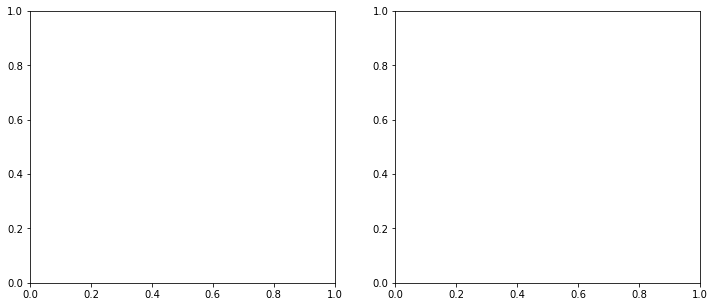

In [335]:
for session in full_evs['session'].unique():
    print('Session %d' %session)
    log = pd.read_json('/data/eeg/{}/behavioral/EFRCourierReadOnly/session_{}/session.jsonl'.format(sub_df_subject, sub_df_session), lines=True)
    log = log[(log.type=='PlayerTransform')|(log.type=='object presentation begins')]

    def extract_position(row):
        if row.type=='PlayerTransform':
            return (row['data']['positionX'], row['data']['positionY'], row['data']['positionZ'])
        elif row.type=='object presentation begins':
            return eval(row['data']['player position'])
        else:
            return np.nan

    log['location']=log.apply(extract_position, axis=1)
    log['trial']=log.apply(lambda row: row['data']['trial number'] if np.isin('trial number', list(row['data'].keys())) else np.nan, axis=1)
    movements = log.fillna(method='pad').dropna()
    sess_pos = np.stack(list(map(list, movements.location.values)))
    
    group_mov = movements.groupby('trial')
    dd_list = np.array(list(group_mov.groups.keys())).astype(int)
    pos_by_list = [np.stack(list(map(list, group_mov.get_group(i)['location']))) for i in dd_list]
    fig, ax = plt.subplots(len(dd_list)//2+len(dd_list)%2, 2, figsize=(12, 5*(len(dd_list)//2+len(dd_list)%2)))
    ax = ax.ravel()
    for i, dd in enumerate(dd_list):
        store_locs = log['data'][(log.type=='object presentation begins')&(log.trial==i)].apply(lambda json: eval(json['store position']))
        store_names = log['data'][(log.type=='object presentation begins')&(log.trial==i)].apply(lambda json: json['store name'])
        list_stores = np.stack(list(map(list, store_locs.values)))

        points = np.array([pos_by_list[i][:, 0], pos_by_list[i][:, 2]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='hot')
        # Set the values used for colormapping
        lc.set_array(np.linspace(0, 1, len(segments)))
        lc.set_linewidth(3); lc.set_alpha(.6)
        line = ax[i].add_collection(lc)
        ax[i].scatter(list_stores[:, 0], list_stores[:, 2])
        texts = []
        for x, y, name, order in zip(list_stores[:, 0], list_stores[:, 2], store_names, np.arange(len(store_names))):
            texts.append(ax[i].text(x-5, y+5, name.capitalize() + ' ({})'.format(order)))
        adjust_text(texts)
        ax[i].set_title('DD %d' %dd, fontsize=14)
        ax[i].set_xticklabels([]);ax[i].set_yticklabels([])
    plt.tight_layout()
    cbar = fig.colorbar(line, ax=ax[:], location='right', shrink = 0.5)
    cbar.set_label('% of path')
    fig.set_facecolor('white')
    plt.show()

jupyter nbconvert --execute --to html EFRCourier_behavioral_analysis_clean.ipynb --no-input

This should create EFRCourier_behavioral_analysis.html file. You can rename this into something else like Noa_report.html afterwards.

# iEEG

 Load data using CMLReader

choose subject and experiment

In [8]:
# whole_df = cml.CMLReader.get_data_index() 
# exp = 'EFRCourierOpenLoop'
# subject = 'R1620J'# 'R1620J' # R1637T
# sub_df = whole_df.query('experiment == @exp and subject == @subject')
# sub_df

In [9]:
# sub_df_subject = sub_df.iloc[0]['subject']
# sub_df_exp = sub_df.iloc[0]['experiment']
# sub_df_session = sub_df.iloc[0]['session']
# reader = cml.CMLReader(subject=sub_df_subject, experiment=sub_df_exp, session=sub_df_session)
# evs = reader.load('task_events')
# # evs = evs.drop(columns=['stim_params']) # otherwise get unhashable dict error from xarray
# evs.head(6)
# evs = add_phase(evs)
# evs.phase.unique()

# Stimulation Parameter Summary

make sure only one channel was stimulated

In [10]:
DDs = evs['trial'].unique()
DDs=DDs[DDs>=0]

parameters_df2=pd.DataFrame([])
for i,delivery_day_df in evs.groupby('trial'):
    if delivery_day_df['trial'].unique()>=0:
        encoding_df=delivery_day_df[delivery_day_df['phase']=='encoding']
        encoding_stim_num = len(encoding_df[encoding_df['type']=='STIM'])
        retrieval_df=delivery_day_df[delivery_day_df['phase']=='retrieval']
        retrieval_stim_num = len(retrieval_df[retrieval_df['type']=='STIM'])
        
        stim_df=delivery_day_df[delivery_day_df['type']=='STIM']
        burst_freq=stim_df['stim_params'].iloc[0]['burst_freq']
        
        parameters_df2 = parameters_df2.append({'Burst frequency (Hz)':burst_freq,'DD':delivery_day_df['trial'].unique()[0],
                                               'Number of encoding stim':encoding_stim_num,'Number of retrieval stim (EFR)':retrieval_stim_num
                                               },ignore_index=True)
#         parameters_df2 = parameters_df2.append({'Burst frequency (Hz)':burst_freq,'DD':delivery_day_df['trial'].unique()[0],
#                                                'Number of encoding stim':encoding_stim_num,'Number of retrieval stim (EFR)':retrieval_stim_num,
#                                                'Number of FSR stim':FSR_stim_num,'Number of FFR stim':FFR_stim_num},ignore_index=True)
parameters_df2 

# add final free recall of stores:
FSR_array = np.zeros(len(evs.trial.unique()[evs.trial.unique()>=0]))*np.nan
FSR_df=evs[evs['phase']=='FSR']
FSR_stim_num = len(FSR_df[FSR_df['type']=='STIM'])
# FSR_array[FSR_df.trial.unique()[0]]=FSR_stim_num

# add final free recall of stores:
FFR_array = np.zeros(len(evs.trial.unique()[evs.trial.unique()>=0]))*np.nan
FFR_df=evs[evs['phase']=='FFR']
FFR_stim_num = len(FFR_df[FFR_df['type']=='STIM'])
# FFR_array[FFR_df.trial.unique()[0]]=FFR_stim_num



parameters_df2['Number of FSR stim']=FSR_array
parameters_df2['Number of FFR stim']=FFR_array

parameters_df2

,Burst frequency (Hz),DD,Number of encoding stim,Number of retrieval stim (EFR),Number of FSR stim,Number of FFR stim
0,3.0,0.0,0.0,0.0,NaN,NaN
1,8.0,1.0,0.0,0.0,NaN,NaN
2,3.0,2.0,0.0,0.0,NaN,NaN
3,8.0,3.0,0.0,0.0,NaN,NaN
4,3.0,4.0,0.0,0.0,NaN,NaN


Burst frequency should be alternating between 3 and 8 Hz.

Number of encoding stim should be equal to 0.5 of encoded items (6).

Number of retrieval stim events should be equal to:
the length of the retrieval period (90 sec for EFR and FSR, 180 sec for FFR) / duration of each stim event (3 sec)*2

In [11]:
evs=add_phase(evs)

stim_index=evs[evs['type']=='STIM'].index
labels=pd.DataFrame([])
# burst_freq = []
for ind in stim_index:
    stim_params=evs['stim_params'].loc[ind]
    anode_label=stim_params['anode_label']
    cathode_label=stim_params['cathode_label']
    label1 = [anode_label+'-'+cathode_label]
    label2 = [cathode_label+'-'+anode_label]
    labels = labels.append(label1)
    labels = labels.append(label2)
#     burst_freq.append(stim_params['burst_freq'])

labels[0].unique()
labels=labels[0].unique()
# print(labels)
# print(evs['phase'].unique())

In [12]:
amplitude=evs['stim_params'].loc[stim_index[0]]['amplitude']
stim_duration=evs['stim_params'].loc[stim_index[0]]['stim_duration']
pulse_freq=evs['stim_params'].loc[stim_index[0]]['pulse_freq']

In [13]:
evs=evs.drop(columns=['stim_params'])# otherwise ptsa won't work
reader = cml.CMLReader(subject=sub_df_subject, experiment=sub_df_exp, session=sub_df_session,montage=sub_df.iloc[0]['montage'],localization=sub_df.iloc[0]['localization'])
word_evs = evs[evs.type=='WORD']
# evs=evs.drop['stim_params']
pairs = reader.load('pairs')
pairs
buf = 2000
eeg= reader.load_eeg(word_evs, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs)#.to_ptsa()
eeg_ptsa = eeg.to_ptsa()


convert label to location:

In [14]:
# evs.type.isin(wanted)
stim_pair = pairs[pairs['label'].isin(labels)]
if  np.any(stim_pair.columns.isin(['stein.region'])) and stim_pair['stein.region'].iloc[0]!= None:
    stim_region=stim_pair['stein.region']
elif  np.any(stim_pair.columns.isin(['mni.region'])) and stim_pair['mni.region'].iloc[0]!= None:
    stim_region=stim_pair['mni.region']
elif  np.any(stim_pair.columns.isin(['ind.region'])) and stim_pair['ind.region'].iloc[0]!= None:
    stim_region=stim_pair['ind.region']

# stim_region

In [15]:
# parameters_df=pd.DataFrame({'anode':anode_label,'cathode':cathode_label},ignore_index=True)
data={'Anode':[anode_label],'Cathode':[cathode_label],'Region':[stim_region.iloc[0]],'Atlas':[stim_region.name],
     'Amplitude [mA]':amplitude,'Duration [ms]':stim_duration,'Pulse Frequency [Hz]':pulse_freq}
parameters_df=pd.DataFrame(data)
parameters_df
# evs['stim_params'

,Anode,Cathode,Region,Atlas,Amplitude [mA],Duration [ms],Pulse Frequency [Hz]
0,RMTP6,RMTP5,Right MTG middle temporal gyrus,mni.region,0.5,3000,-1


# Plot EEG

seperate encoded words to stim and no-stim

In [282]:
encoding_evs = evs[evs['phase']=='encoding']
# encoding_evs


In [284]:
# Stim during encoding:
Estim=pd.DataFrame([]);
Enostim=pd.DataFrame([])


encoding_evs = evs[evs['phase']=='encoding']
stim_words=[]; nonstim_words=[]
for indx in range(len(encoding_evs)):
    if indx > 0:
        if encoding_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='STIM':
            stim_words.append(encoding_evs.iloc[indx]['item'])
        elif encoding_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='pointing finished':
            nonstim_words.append(encoding_evs.iloc[indx]['item'])
    elif indx == 0: # account for first item in list
            if encoding_evs.iloc[indx]['type']=='WORD':
                nonstim_words.append(encoding_evs.iloc[indx]['item'])

#     assert(len(stim_words)  + len(nonstim_words))==27 ,f'Error in words number: subject {ret_stim_subject} session {ret_stim_session} list {ret_stim_list}'      
Estim=Estim.append(encoding_evs[encoding_evs['item'].isin(stim_words)])
Enostim=Enostim.append(encoding_evs[encoding_evs['item'].isin(nonstim_words)])
# print(len(Estim))
# print(len(Enostim))



Text(0.5, 1.0, 'Encoding')

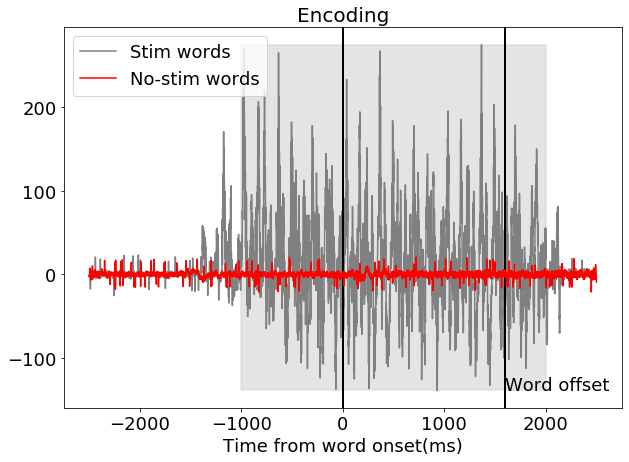

In [287]:

filter_line_noise = True # filter 60 and 120 hz

# word_evs = evs[evs.type=='WORD']
events=[Estim,Enostim]
events_title=['Stim Words','No-Stim Words']


buf = 2000
eeg_ptsa = reader.load_eeg(Estim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

plt.figure(figsize=(10, 7))
eeg_raw = eeg_ptsa.mean(dim=['event','channel'])#.plot()
e=eeg_raw.plot(label = "Stim words",color='grey')

#3 plot charachteristics
plt.xlabel('Time from word onset(ms)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x=0,color='black',linewidth=2)
plt.axvline(x=1600,color='black',linewidth=2)
# add rectangle
hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
rect = plt.Rectangle((-1000,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
plt.text(1600, int(min(eeg_raw)), 'Word offset', fontsize = 18)
# Add the patch to the Axes
plt.gca().add_patch(rect)


# Plot no-stim data
eeg_ptsa = reader.load_eeg(Enostim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

eeg_raw = eeg_ptsa.mean(dim=['event','channel'])#.plot()
e=eeg_raw.plot(label = "No-stim words",color='red')
plt.legend(loc="upper left",fontsize=18)
e=plt.xlabel('Time from word onset (ms)', fontsize=18)
plt.title('Encoding', fontsize=20)


Raw iEEG data, averaged across all channels, for either stimulated words (grey) or not-stimulated words (red).

Grey background mark stimulation time window (1 sec prior to words presentation and up to 400 ms follwing the end of word presentation)

Vertical black lines mark word onset and offset.

# Plot stimulation during retrieval


In [291]:
def retrieval_plot (evs,title):
    '''
    evs is a dataframe
    title is the title to be shown in the graph (should be string)
    '''
    filter_line_noise = True # filter 60 and 120 hz

    buf = 3000
    eeg_ptsa = reader.load_eeg(evs, rel_start=-1000 - buf, rel_stop=1000 + buf, scheme=pairs).to_ptsa()

    # Butterworth filter to remove 60 Hz line noise + harmonic at 120
    if filter_line_noise == True:
        eeg_ptsa = eeg_ptsa.filtered([58, 62])
        eeg_ptsa = eeg_ptsa.filtered([118, 122])

    plt.figure(figsize=(10, 7))
    eeg_raw = eeg_ptsa.mean(dim=['event','channel'])#.plot()
    e=eeg_raw.plot(color='grey')

    # plot charachteristics
    plt.xlabel('Time from stimulation onset (ms)', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(title,fontsize=18)
    # # add rectangle
    hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
    rect = plt.Rectangle((0,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
    plt.text(3000, int(min(eeg_raw)), 'stimulation offset', fontsize = 18)
    # Add the patch to the Axes
    plt.gca().add_patch(rect)


## Externalized free-recall phase

In [292]:
retrieval_evs = evs[evs['phase']=='retrieval']
stim_retrieval_evs = retrieval_evs[retrieval_evs['type']=='STIM']
# stim_retrieval_evs.head(3)

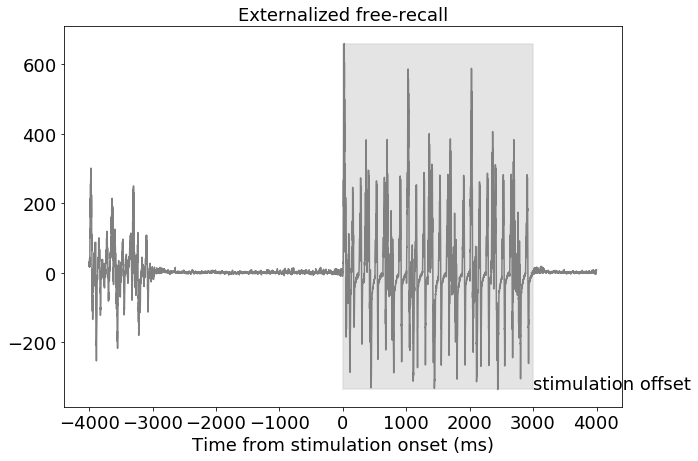

In [293]:
retrieval_plot(stim_retrieval_evs,'Externalized free-recall')

Raw iEEG data, averaged across all channels, for the externalized free-recall retrieval period.

Grey background mark stimulation time window (total duration of 3 sec)


## Final free-recall of items


In [294]:
FFR_evs = evs[evs['phase']=='FFR']
stim_FFR_evs = FFR_evs[FFR_evs['type']=='STIM']
# stim_FFR_evs.head(3)

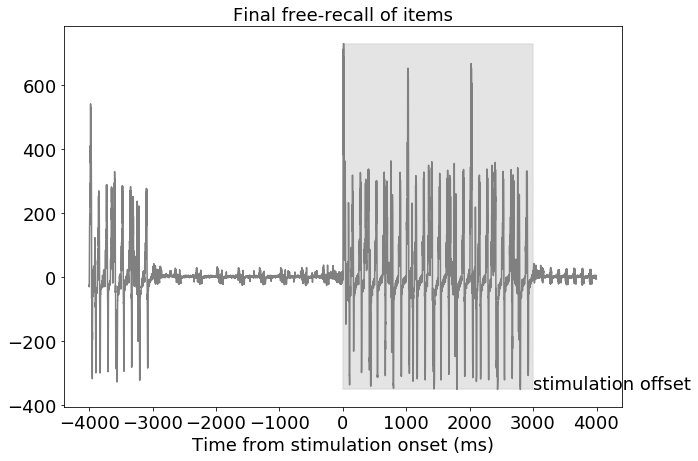

In [295]:
retrieval_plot(FFR_evs,'Final free-recall of items')

## Final free-recall of stores


In [296]:
FSR_evs = evs[evs['phase']=='FSR']
stim_FSR_evs = FSR_evs[FSR_evs['type']=='STIM']
# stim_FSR_evs.head(3)

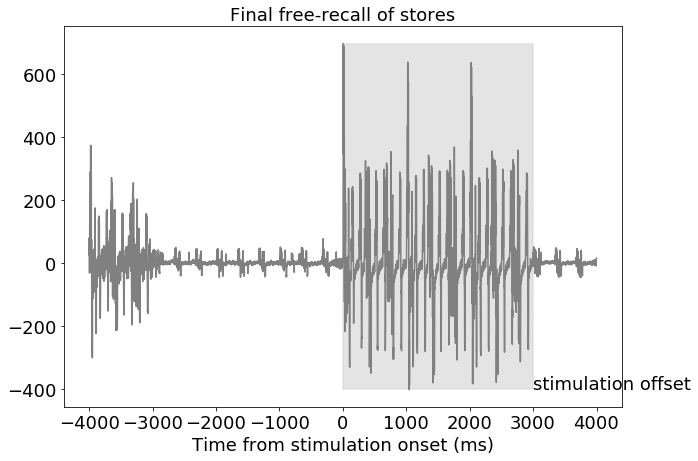

In [38]:
retrieval_plot(FSR_evs,'Final free-recall of stores')

# Single trial by channel

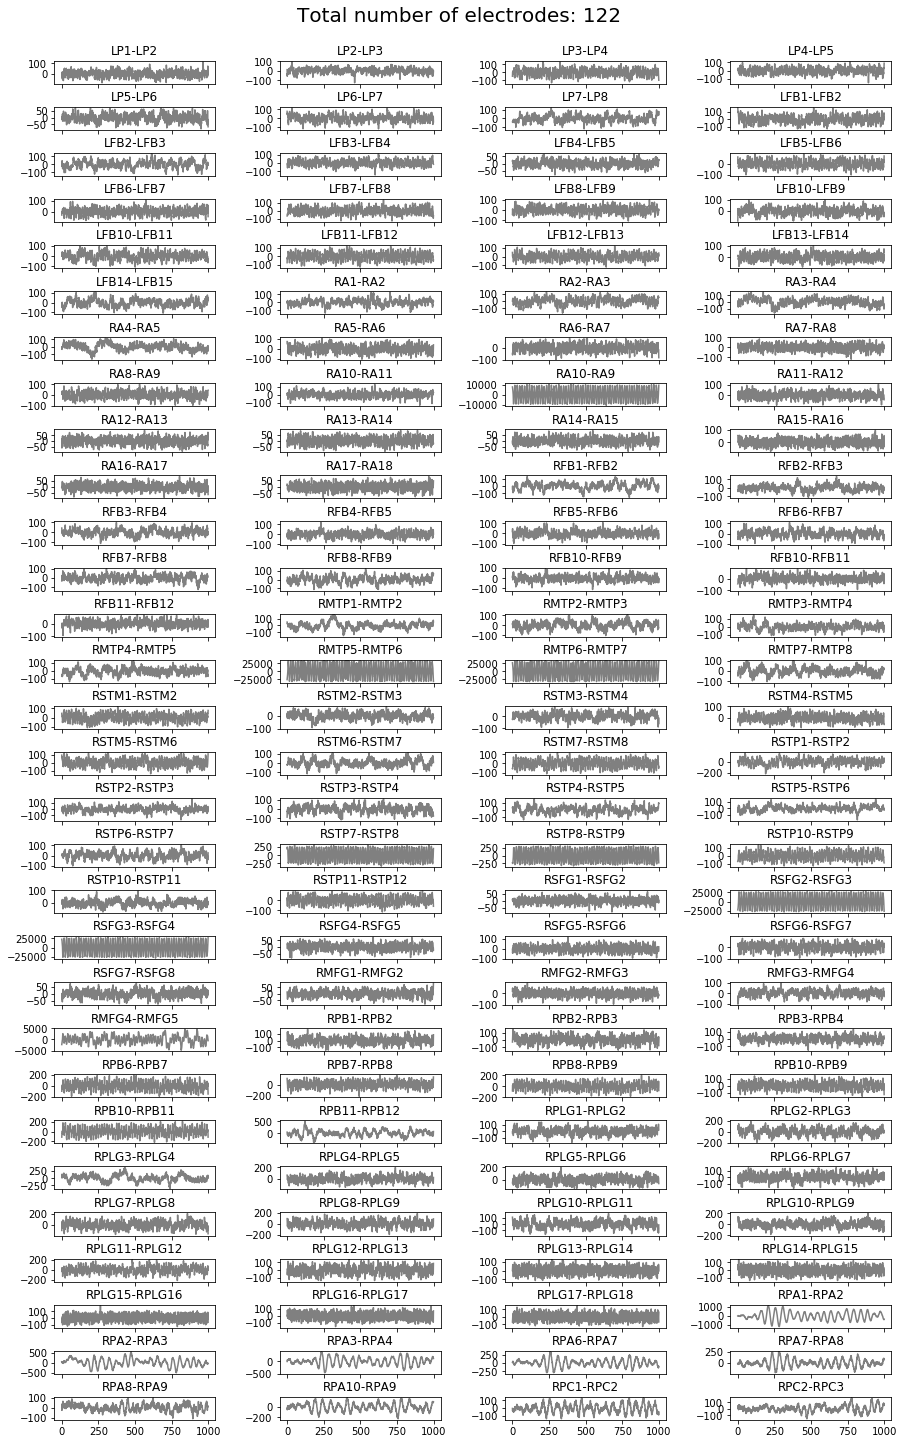

In [297]:
filter_line_noise = False # filter 60 and 120 hz
event_number_to_plot = 5  # which event to plot data? Maybe don't select 0 since first one could be weird

no_stim_evs = evs[evs.type=='pointing finished']
# rec_evs = evs[evs.type=='REC_WORD']
pairs = reader.load('pairs')

#     pairs = reader.load('pairs')
buf = 500
eeg = reader.load_eeg(no_stim_evs, rel_start= -buf , rel_stop = 1000 + buf, scheme=pairs)
eeg_ptsa = eeg.to_ptsa()[event_number_to_plot]

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

fig, ax = plt.subplots(len(pairs)//4, 4, figsize=(15, 25), sharex=True, sharey=False)
ax = np.ravel(ax)
for i in range(len(pairs) - len(pairs)%4):
    ax[i].plot(eeg_ptsa[i, :1000],color='grey')
    ax[i].set_title(pairs['label'].iloc[i])
    if i ==len(pairs) - len(pairs)%4:
        ax[i].set_xlabel('Time (ms)')
    
plt.subplots_adjust(wspace=.4, hspace=1)
# plt.suptitle(sub_df_subject+', session '+str(sub_df_session), fontsize=20,y=0.91)
_=plt.suptitle('Total number of electrodes: '+ str(len(pairs)), fontsize=20,y=0.91)

# plt.plot()

# print('Number of electrodes: ', len(pairs))

Raw iEEG data (1 Sec) in each collected channel for one example trial.

# SME

CPP total time wavelet loop:  3.4785354137420654


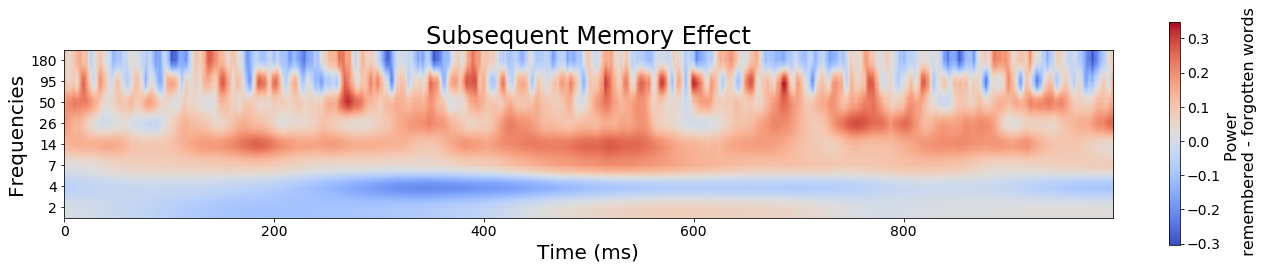

In [299]:
from ptsa.data.filters import MorletWaveletFilter

word_evs = evs[evs.type=='WORD']
contacts = reader.load('contacts')

buf = 500
eeg = reader.load_eeg(word_evs, rel_start=-500 - buf, rel_stop=500 + buf, scheme=contacts)
sr = round(eeg.samplerate)
eeg_ptsa = eeg.to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
eeg_ptsa = eeg_ptsa.filtered([58, 62])
eeg_ptsa = eeg_ptsa.filtered([118, 122])

#Get spectral power
myfreqs = np.logspace(np.log10(2), np.log10(180), 8)  #4-100 Hz, 40 frequencies
wf = MorletWaveletFilter(timeseries=eeg_ptsa, freqs=myfreqs, width=4, output='power') 
pow_wavelet = wf.filter()   #output is freqs, events, elecs, and time
buff_in_samples=int((buf/1000.)*sr) # convert buffer time to samples
pows = pow_wavelet.isel(time=np.arange(buff_in_samples,len(pow_wavelet.time)-buff_in_samples))  #remove buffer period    
pows = np.log10(pows) # get log of powers. # powes time is 2750 samples, corresponding to 2750/500=5,500ms. # in some versions use:np.log10(pows.data) instead.

mask = word_evs.recalled.astype(bool).values
sme = pows[:, mask].mean(['event', 'channel']) - pows[:, ~mask].mean(['event', 'channel'])

# PLOT
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
im = ax.imshow(sme, cmap='coolwarm', aspect = 20, interpolation='hamming')
plt.yticks(ticks = range(0, 8), labels=[f"{f:.0f}" for f in np.logspace(np.log10(2), np.log10(180), 8)])
labels = ax.get_xticklabels()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Frequencies', fontsize=20)
plt.title('Subsequent Memory Effect', fontsize=24)
cbar = plt.colorbar(im, ax=ax, fraction = .01)
cbar.set_label(label='Power \n remembered - forgotten words', size=16)
cbar.ax.tick_params(labelsize=14)
plt.gca().invert_yaxis()
plt.show()